# **알고리즘의 데이터 학습을 위한 전처리**

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Machine-Learning/blob/main/Practice2-7_DataAnalysis_Preprocessing_TimeSeries_KK.ipynb)

> **"스몰/빅데이터든 `프로그래밍이라는 방식을 통해` 데이터를 준비하고 탐색하고 시각화 하면서 데이터의 패턴을 `직접적으로 확인`하는 것 대신,"**
>
> $\rightarrow$ **"`데이터의 전처리를 통해 기계학습과 같은 알고리즘에 전달`해주면 알고리즘이 알아서 정교한 데이터의 패턴을 찾아주고 우리는 `간접적으로 확인만`하면 되는 것이 알고리즘을 통한 모델링 과정"**

<center><img src='Image/Advanced/Bigdata_Algorithm.png' width='600'></center>

## 시계열 처리(Time Series Processing)

**1) Time Series Analysis:** `미래를 예측하려는 인간의 의지`로 출발하였으며, 우리의 삶 모든 곳에서 `시간 흐름에서 벗어날 수 없고` 이를 이해하고 해석하여 `의미있는 패턴`을 찾아 미래를 예측하는 기술

- **시계열 데이터(Time Series Data):** `일정한 시간 간격`에 따라 `순차적(Sequentially)으로 기록`된 `확률적 프로세스` 또는 `시간변화 데이터`

> - 시간의 흐름에 따라 `불규칙적 변동`을 분석하기 위해 `필수적 데이터`
> - `과거`가 `미래`에 어떤 영향을 주는지 `분석을 통해 예측` 가능
> - 최근 `기계학습과 딥러닝`을 사용하여 `복잡한 데이터 예측`
> - 시계열예측과 기계학습/딥러닝 간 `전처리와 알고리즘 방식 차이` 때문에, 별도로 `(1) 시계열 데이터분석 단계 이해, (2) 시계열 데이터의 전처리, (3) 시계열 알고리즘 이해` 필수!

<center><img src='Image/Advanced/TS_Example1.png' width='900'></center>
<center><img src='Image/Advanced/TS_Example2.png' width='900'>(https://www.ecb.europa.eu/pub/financial-stability/fsr/html/ecb.fsr202205~f207f46ea0.en.html#toc6)</center>

---

**2) 시계열 전처리(Time Series Preprocessing):**

> **"`시간패턴` 이해와 적용을 위해 `시간특징을 추출하고 반영`하여 `문제의 용도와 알고리즘에 맞게` 사전에  처리"**
>
> - 최근 `기계학습과 딥러닝`을 사용하여 `복잡한 데이터 예측`
> - 기계학습/딥러닝과 시계열예측 간 `전처리와 알고리즘 반영 차이` 때문에, `시계열 변수생성 또는 알고리즘은 별도의 관점 이해` 필수!

<center><img src='Image/Advanced/TS_MS_Comparison.png' width='900'></center>


# **데이터 불러오기(Data Loading)**

In [1]:
# # Colab에서 실행
# # 아래 코드 실행 후 파일 선택을 눌러서 
# # 'Food_Agriculture_Organization_UN_Full.csv' 파일을 선택해주면 로딩 완료
# from google.colab import files
# files.upload()

# # 아래 코드 실행 시 'Food_Agriculture_Organization_UN_Full.csv' 데이터 출력 가능
# import pandas as pd
# df = pd.read_csv('Food_Agriculture_Organization_UN_Full.csv')
# df

In [2]:
# Local PC에서 실행
# 상대위치로 예제 데이터 로딩
import os
import pandas as pd

location_rel = os.path.join('.', 'Data', 'FoodAgricultureOrganization', 'Food_Agriculture_Organization_UN_Full.csv')
df = pd.read_csv(location_rel)
df = df[[col for col in df.columns if col[:2] != 'Y1']]
df

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


| **변수명** | **의미** |
|:---|:---|
| Area Abbreviation | 국가명 축약어 |
| Area Code | 국가코드 숫자 |
| Area | 국가명 |
| Item Code | 음식코드 |
| Item | 음식 |
| Element Code | 음식 또는 사료 코드 |
| Element | 음식 또는 사료 |
| Unit | 단위 |
| Latitude | 생산위치 위도 |
| Longitude | 생산위치 경도 |
| Y1961 | 1961년도 생산량 |
| Y1962 | 1962년도 생산량 |
| $\dots$ | $\dots$ |
| Y2013 | 2013년도 생산량 |

# **시간인덱스 처리(Time Index Preprocessing)**

## 시간데이터

| **대분류** | **소분류** | **컴퓨터의 분류1** | **컴퓨터의 분류2** |
|:---:|:---:|:---:|:---:|
| **질적변수(Qualitative Variable)** | **-** | - | 범주형 |
|  | **명목형 변수(Nominal Variable)** | 문자 | 범주형 |
|  | **순위형 변수(Ordinal Variable)** | 숫자 | 범주형 |
| **양적변수(Quantitative Variable)** | **-** | - | 연속형 |
|  | **이산형 변수(Discrete Variable)** | 숫자 | 연속형 |
|  | **연속형 변수(Continuous Variable)** | 숫자 | 연속형 |

> - **문자형 vs 숫자형**: `문자`를 숫자로 바꾸어 컴퓨터가 이해가능하도록 변환
> - **범주형 vs 연속형**: `범주형`을 알고리즘이 이해가능하도록 변환

---

> **"범주형과 연속형 이외 다른 변수의 유형으로 `날짜나 시간 데이터`"**
>
> **"모든 분석문제에는 `시간을 고려`할 수밖에 없지만 닥터 스트레인지가 되고 싶어하는 많은 분석가들에게 `쉽지 않은 현실`"**
>
> **"시간변수는 `시계열(Time Series) 또는 시퀀스(Time Sequence)`라고도 하며 데이터분석에서 중요한 역할"**
>
>```python
> # 시간정보 생성
import datetime as dt
dt.datetime(year, month, day)
dt.datetime(year, month, day, hour, minute, second)
>
> import pandas as pd
pd.Timestamp('year-month-dayThour:minute:second')
>```


In [3]:
# 날짜와 시간을 다루는 datetime 모듈을 dt 라는 닉네임으로 로딩
# 임의 시간 설정
import datetime as dt

future = dt.datetime(2108, 11, 4, 13, 30, 59)    # (year, month, day, hour, minute, second)
future

datetime.datetime(2108, 11, 4, 13, 30, 59)

In [4]:
# 설정 시간을 문자로 출력
str(future)

'2108-11-04 13:30:59'

In [5]:
# 날짜 또는 시간 추출
str(future)[:10], str(future)[10:]

('2108-11-04', ' 13:30:59')

In [6]:
# 표시형식 변경하기
future.strftime('%Y/%m/%d, %H/%M/%S')

'2108/11/04, 13/30/59'

In [7]:
# 임의 시간정보의 요일 확인
# 일요일은 0부터
future.strftime('%w')

'0'

In [8]:
# 임의 시간정보의 주차 확인
# %U는 일요일이 주의 첫번째 날짜로, %W는 월요일이 주의 첫번째 날짜로
future.strftime('%U'), future.strftime('%W')

('45', '44')

In [9]:
# pandas로 임의 시간 설정
past = pd.Timestamp('2008-11-04T13:30:59')
past

Timestamp('2008-11-04 13:30:59')

In [10]:
# 설정 시간을 문자로 출력
str(past)

'2008-11-04 13:30:59'

In [11]:
# 날짜 또는 시간 추출
str(past)[:10], str(past)[10:]

('2008-11-04', ' 13:30:59')

In [12]:
# 표시형식 변경하기
past.strftime('%Y/%m/%d, %H/%M/%S')

'2008/11/04, 13/30/59'

In [13]:
# 임의 시간정보의 요일 확인
# 일요일은 0부터
past.strftime('%w')

'2'

In [14]:
# 임의 시간정보의 주차 확인
past.strftime('%U'), past.strftime('%W')

('44', '44')

In [15]:
future, past

(datetime.datetime(2108, 11, 4, 13, 30, 59), Timestamp('2008-11-04 13:30:59'))

In [16]:
# Timestamp로 바꾸기
# pd.to_datetime() 함수로 변경 가능
pd.to_datetime(future)

Timestamp('2108-11-04 13:30:59')

In [17]:
# datatime으로 바꾸기
# to_pydatetime() 함수로 변경 가능
past.to_pydatetime()

datetime.datetime(2008, 11, 4, 13, 30, 59)

In [18]:
# date만 추출
past.to_pydatetime().date()

datetime.date(2008, 11, 4)

In [19]:
# date만 추출
future.date(), past.date()

(datetime.date(2108, 11, 4), datetime.date(2008, 11, 4))

In [20]:
# time만 추출
future.time(), past.time()

(datetime.time(13, 30, 59), datetime.time(13, 30, 59))

In [21]:
# 현재의 날짜 시간정보 추출
dt.datetime.now(), pd.Timestamp.now()

(datetime.datetime(2025, 3, 1, 22, 58, 48, 884771),
 Timestamp('2025-03-01 22:58:48.884771'))

## 시간인덱스 생성

- Timestamp와 datetime은 `형태나 사용방식`이 굉장히 `유사`
- 특정 시간정보 변수를 `시계열 타입으로 변환`하거나 `Index로 사용`할때는 `DatetimeIndex` 필요
- `DatetimeIndex`는 특정 순간에 기록된 `Timestamp` 형식의 인덱스
> (1) `pd.date_range()`
>
> (2) `pd.to_datetime()`

In [22]:
# 데이터의 기존 인덱스 확인
df.index

RangeIndex(start=0, stop=21477, step=1)

In [23]:
# 임의 시간정보 데이터 생성
pd.date_range('2100-01-01', periods=df.shape[0])

DatetimeIndex(['2100-01-01', '2100-01-02', '2100-01-03', '2100-01-04',
               '2100-01-05', '2100-01-06', '2100-01-07', '2100-01-08',
               '2100-01-09', '2100-01-10',
               ...
               '2158-10-11', '2158-10-12', '2158-10-13', '2158-10-14',
               '2158-10-15', '2158-10-16', '2158-10-17', '2158-10-18',
               '2158-10-19', '2158-10-20'],
              dtype='datetime64[ns]', length=21477, freq='D')

In [24]:
# DatetimeIndex의 각 값들은 Timestamp
pd.date_range('2100-01-01', periods=df.shape[0])[0]

Timestamp('2100-01-01 00:00:00')

In [25]:
# freq 매개변수로 원하는 빈도 설정 가능
# 5일간격 시간인덱스 생성
pd.date_range('2100-01-01', periods=10, freq='5d')

DatetimeIndex(['2100-01-01', '2100-01-06', '2100-01-11', '2100-01-16',
               '2100-01-21', '2100-01-26', '2100-01-31', '2100-02-05',
               '2100-02-10', '2100-02-15'],
              dtype='datetime64[ns]', freq='5D')

In [26]:
# freq 매개변수로 원하는 빈도 설정 가능
# 주별간격 시간인덱스 생성
pd.date_range('2100-01-01', periods=10, freq='1w')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\3736229422.py:3: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  pd.date_range('2100-01-01', periods=10, freq='1w')


DatetimeIndex(['2100-01-03', '2100-01-10', '2100-01-17', '2100-01-24',
               '2100-01-31', '2100-02-07', '2100-02-14', '2100-02-21',
               '2100-02-28', '2100-03-07'],
              dtype='datetime64[ns]', freq='W-SUN')

In [27]:
# freq 매개변수로 원하는 빈도 설정 가능
# 주별 특정요일간격 시간인덱스 생성
pd.date_range('2100-01-01', periods=10, freq='W-FRI')

DatetimeIndex(['2100-01-01', '2100-01-08', '2100-01-15', '2100-01-22',
               '2100-01-29', '2100-02-05', '2100-02-12', '2100-02-19',
               '2100-02-26', '2100-03-05'],
              dtype='datetime64[ns]', freq='W-FRI')

In [28]:
# freq 매개변수로 원하는 빈도 설정 가능
# 주별 특정요일간격 시간인덱스 생성
pd.date_range('2100-01-01', periods=10, freq='W-WED')

DatetimeIndex(['2100-01-06', '2100-01-13', '2100-01-20', '2100-01-27',
               '2100-02-03', '2100-02-10', '2100-02-17', '2100-02-24',
               '2100-03-03', '2100-03-10'],
              dtype='datetime64[ns]', freq='W-WED')

In [29]:
# freq 매개변수로 원하는 빈도 설정 가능
# 매월 2번째 특정요일간격 시간인덱스 생성
pd.date_range('2100-01-01', periods=10, freq='WOM-2WED')

DatetimeIndex(['2100-01-13', '2100-02-10', '2100-03-10', '2100-04-14',
               '2100-05-12', '2100-06-09', '2100-07-14', '2100-08-11',
               '2100-09-08', '2100-10-13'],
              dtype='datetime64[ns]', freq='WOM-2WED')

In [30]:
# freq 매개변수로 원하는 빈도 설정 가능
# 매월 3번째 특정요일간격 시간인덱스 생성
pd.date_range('2100-01-01', periods=10, freq='WOM-3FRI')

DatetimeIndex(['2100-01-15', '2100-02-19', '2100-03-19', '2100-04-16',
               '2100-05-21', '2100-06-18', '2100-07-16', '2100-08-20',
               '2100-09-17', '2100-10-15'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

|  **함수 설정** | **시작날짜** | **근무일반영** |
|:--------------:|:------------:|:--------------:|
| **freq='M'**   | 월말         | X              |
| **freq='MS'**  | 월초         | X              |
| **freq='BM'**  | 월말         | O              |
| **freq='BMS'** | 월초         | O              |

In [31]:
# freq 매개변수로 원하는 빈도 설정 가능
pd.date_range('2100-01-01', periods=10, freq='M')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1175795964.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range('2100-01-01', periods=10, freq='M')


DatetimeIndex(['2100-01-31', '2100-02-28', '2100-03-31', '2100-04-30',
               '2100-05-31', '2100-06-30', '2100-07-31', '2100-08-31',
               '2100-09-30', '2100-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [32]:
# freq 매개변수로 원하는 빈도 설정 가능
pd.date_range('2100-01-01', periods=10, freq='MS')

DatetimeIndex(['2100-01-01', '2100-02-01', '2100-03-01', '2100-04-01',
               '2100-05-01', '2100-06-01', '2100-07-01', '2100-08-01',
               '2100-09-01', '2100-10-01'],
              dtype='datetime64[ns]', freq='MS')

|     **함수 설정**    | **시작날짜** | **근무일반영** |
|:--------------------:|:------------:|:--------------:|
| **freq='Q-(MON)'**   | 월말         | X              |
| **freq='QS-(MON)'**  | 월초         | X              |
| **freq='BQ-(MON)'**  | 월말         | O              |
| **freq='BQS-(MON)'** | 월초         | O              |

In [33]:
# freq 매개변수로 원하는 빈도 설정 가능
pd.date_range('2100-01-01', periods=10, freq='Q-Mar')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\578001779.py:2: FutureWarning: 'Q-Mar' is deprecated and will be removed in a future version, please use 'QE-MAR' instead.
  pd.date_range('2100-01-01', periods=10, freq='Q-Mar')


DatetimeIndex(['2100-03-31', '2100-06-30', '2100-09-30', '2100-12-31',
               '2101-03-31', '2101-06-30', '2101-09-30', '2101-12-31',
               '2102-03-31', '2102-06-30'],
              dtype='datetime64[ns]', freq='QE-MAR')

In [34]:
# freq 매개변수로 원하는 빈도 설정 가능
pd.date_range('2100-01-01', periods=10, freq='QS-Mar')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2565638340.py:2: FutureWarning: 'QS-Mar' is deprecated and will be removed in a future version, please use 'QS-MAR' instead.
  pd.date_range('2100-01-01', periods=10, freq='QS-Mar')


DatetimeIndex(['2100-03-01', '2100-06-01', '2100-09-01', '2100-12-01',
               '2101-03-01', '2101-06-01', '2101-09-01', '2101-12-01',
               '2102-03-01', '2102-06-01'],
              dtype='datetime64[ns]', freq='QS-MAR')

|     **함수 설정**    | **시작날짜** | **근무일반영** |
|:--------------------:|:------------:|:--------------:|
| **freq='A-(MON)'**   | 월말         | X              |
| **freq='AS-(MON)'**  | 월초         | X              |
| **freq='BA-(MON)'**  | 월말         | O              |
| **freq='BAS-(MON)'** | 월초         | O              |

In [35]:
# freq 매개변수로 원하는 빈도 설정 가능
pd.date_range('2100-01-01', periods=10, freq='A-Mar')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1353316020.py:2: FutureWarning: 'A-Mar' is deprecated and will be removed in a future version, please use 'YE-MAR' instead.
  pd.date_range('2100-01-01', periods=10, freq='A-Mar')


DatetimeIndex(['2100-03-31', '2101-03-31', '2102-03-31', '2103-03-31',
               '2104-03-31', '2105-03-31', '2106-03-31', '2107-03-31',
               '2108-03-31', '2109-03-31'],
              dtype='datetime64[ns]', freq='YE-MAR')

In [36]:
# freq 매개변수로 원하는 빈도 설정 가능
pd.date_range('2100-01-01', periods=10, freq='AS-Mar')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1265192195.py:2: FutureWarning: 'AS-Mar' is deprecated and will be removed in a future version, please use 'AS-MAR' instead.
  pd.date_range('2100-01-01', periods=10, freq='AS-Mar')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1265192195.py:2: FutureWarning: 'AS-MAR' is deprecated and will be removed in a future version, please use 'YS-MAR' instead.
  pd.date_range('2100-01-01', periods=10, freq='AS-Mar')


DatetimeIndex(['2100-03-01', '2101-03-01', '2102-03-01', '2103-03-01',
               '2104-03-01', '2105-03-01', '2106-03-01', '2107-03-01',
               '2108-03-01', '2109-03-01'],
              dtype='datetime64[ns]', freq='YS-MAR')

## 데이터에 시계열인덱스 적용

> **"`생성한 시간인덱스 또는 시간변수`를 `Series/DataFrame의 Index`로 적용"**
>
>```python
># 생성한 시간인덱스 적용
df.index = pd.date_range(...)
>
># 시간변수 인덱스로 적용
df['변수명'] = pd.to_datetime('변수명')
df.set_index('변수명', inplace=True)
df = df.asfreq('frequency')
>```


In [37]:
# 생성한 시간정보로 인덱스 변경
df_test = df.copy()
df_test.index = pd.date_range('2100-01-01', periods=df.shape[0])
df_test

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2100-01-01,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
2100-01-02,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2100-01-03,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
2100-01-04,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
2100-01-05,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158-10-16,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
2158-10-17,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
2158-10-18,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
2158-10-19,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [38]:
# 임의 시간정보 데이터 리스트 생성
def date_range(start, end, datetime_format="%Y-%m-%d"):
    import datetime as dt
    start = dt.datetime.strptime(start, datetime_format)
    end = dt.datetime.strptime(end, datetime_format)
    dates = [(start + dt.timedelta(days=i)).strftime(datetime_format) for i in range((end-start).days+1)]
    return dates

date_range('2100-01-01', '2158-10-20')

['2100-01-01',
 '2100-01-02',
 '2100-01-03',
 '2100-01-04',
 '2100-01-05',
 '2100-01-06',
 '2100-01-07',
 '2100-01-08',
 '2100-01-09',
 '2100-01-10',
 '2100-01-11',
 '2100-01-12',
 '2100-01-13',
 '2100-01-14',
 '2100-01-15',
 '2100-01-16',
 '2100-01-17',
 '2100-01-18',
 '2100-01-19',
 '2100-01-20',
 '2100-01-21',
 '2100-01-22',
 '2100-01-23',
 '2100-01-24',
 '2100-01-25',
 '2100-01-26',
 '2100-01-27',
 '2100-01-28',
 '2100-01-29',
 '2100-01-30',
 '2100-01-31',
 '2100-02-01',
 '2100-02-02',
 '2100-02-03',
 '2100-02-04',
 '2100-02-05',
 '2100-02-06',
 '2100-02-07',
 '2100-02-08',
 '2100-02-09',
 '2100-02-10',
 '2100-02-11',
 '2100-02-12',
 '2100-02-13',
 '2100-02-14',
 '2100-02-15',
 '2100-02-16',
 '2100-02-17',
 '2100-02-18',
 '2100-02-19',
 '2100-02-20',
 '2100-02-21',
 '2100-02-22',
 '2100-02-23',
 '2100-02-24',
 '2100-02-25',
 '2100-02-26',
 '2100-02-27',
 '2100-02-28',
 '2100-03-01',
 '2100-03-02',
 '2100-03-03',
 '2100-03-04',
 '2100-03-05',
 '2100-03-06',
 '2100-03-07',
 '2100-03-

In [39]:
# 생성한 시간정보로 인덱스 변경
df_test2 = df.copy()

df_test2.index = date_range('2100-01-01', '2158-10-20')
df_test2

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2100-01-01,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
2100-01-02,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2100-01-03,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
2100-01-04,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
2100-01-05,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158-10-16,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
2158-10-17,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
2158-10-18,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
2158-10-19,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [40]:
# 데이터별 인덱스 차이 확인
df_test.index, df_test2.index

(DatetimeIndex(['2100-01-01', '2100-01-02', '2100-01-03', '2100-01-04',
                '2100-01-05', '2100-01-06', '2100-01-07', '2100-01-08',
                '2100-01-09', '2100-01-10',
                ...
                '2158-10-11', '2158-10-12', '2158-10-13', '2158-10-14',
                '2158-10-15', '2158-10-16', '2158-10-17', '2158-10-18',
                '2158-10-19', '2158-10-20'],
               dtype='datetime64[ns]', length=21477, freq='D'),
 Index(['2100-01-01', '2100-01-02', '2100-01-03', '2100-01-04', '2100-01-05',
        '2100-01-06', '2100-01-07', '2100-01-08', '2100-01-09', '2100-01-10',
        ...
        '2158-10-11', '2158-10-12', '2158-10-13', '2158-10-14', '2158-10-15',
        '2158-10-16', '2158-10-17', '2158-10-18', '2158-10-19', '2158-10-20'],
       dtype='object', length=21477))

In [41]:
# 우리 눈에 날짜시간 정보더라도 컴퓨터가 날짜시간 정보로 인식해야
display(df_test['2150-01-01':'2150-12-31'], df_test2['2150-01-01':'2150-12-31'])

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2150-01-01,SR,207,Suriname,2656,Beer,5142,Food,1000 tonnes,3.92,-56.03,...,20.0,22.0,22.0,23.0,24.0,25.0,25.0,26.0,26,26
2150-01-02,SR,207,Suriname,2657,"Beverages, Fermented",5142,Food,1000 tonnes,3.92,-56.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2150-01-03,SR,207,Suriname,2658,"Beverages, Alcoholic",5142,Food,1000 tonnes,3.92,-56.03,...,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2,2
2150-01-04,SR,207,Suriname,2731,Bovine Meat,5142,Food,1000 tonnes,3.92,-56.03,...,2.0,2.0,3.0,4.0,4.0,4.0,6.0,6.0,6,5
2150-01-05,SR,207,Suriname,2732,Mutton & Goat Meat,5142,Food,1000 tonnes,3.92,-56.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150-12-27,CH,211,Switzerland,2574,Rape and Mustard Oil,5142,Food,1000 tonnes,46.82,8.23,...,18.0,19.0,19.0,22.0,26.0,32.0,31.0,33.0,31,36
2150-12-28,CH,211,Switzerland,2575,Cottonseed Oil,5142,Food,1000 tonnes,46.82,8.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2150-12-29,CH,211,Switzerland,2576,Palmkernel Oil,5142,Food,1000 tonnes,46.82,8.23,...,2.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,4,3
2150-12-30,CH,211,Switzerland,2577,Palm Oil,5142,Food,1000 tonnes,46.82,8.23,...,15.0,16.0,16.0,15.0,15.0,15.0,18.0,17.0,16,16


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2150-01-01,SR,207,Suriname,2656,Beer,5142,Food,1000 tonnes,3.92,-56.03,...,20.0,22.0,22.0,23.0,24.0,25.0,25.0,26.0,26,26
2150-01-02,SR,207,Suriname,2657,"Beverages, Fermented",5142,Food,1000 tonnes,3.92,-56.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2150-01-03,SR,207,Suriname,2658,"Beverages, Alcoholic",5142,Food,1000 tonnes,3.92,-56.03,...,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2,2
2150-01-04,SR,207,Suriname,2731,Bovine Meat,5142,Food,1000 tonnes,3.92,-56.03,...,2.0,2.0,3.0,4.0,4.0,4.0,6.0,6.0,6,5
2150-01-05,SR,207,Suriname,2732,Mutton & Goat Meat,5142,Food,1000 tonnes,3.92,-56.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150-12-27,CH,211,Switzerland,2574,Rape and Mustard Oil,5142,Food,1000 tonnes,46.82,8.23,...,18.0,19.0,19.0,22.0,26.0,32.0,31.0,33.0,31,36
2150-12-28,CH,211,Switzerland,2575,Cottonseed Oil,5142,Food,1000 tonnes,46.82,8.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2150-12-29,CH,211,Switzerland,2576,Palmkernel Oil,5142,Food,1000 tonnes,46.82,8.23,...,2.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,4,3
2150-12-30,CH,211,Switzerland,2577,Palm Oil,5142,Food,1000 tonnes,46.82,8.23,...,15.0,16.0,16.0,15.0,15.0,15.0,18.0,17.0,16,16


In [42]:
# 우리 눈에 날짜시간 정보더라도 컴퓨터가 날짜시간 정보로 인식해야
df_test.loc['2150']

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2150-01-01,SR,207,Suriname,2656,Beer,5142,Food,1000 tonnes,3.92,-56.03,...,20.0,22.0,22.0,23.0,24.0,25.0,25.0,26.0,26,26
2150-01-02,SR,207,Suriname,2657,"Beverages, Fermented",5142,Food,1000 tonnes,3.92,-56.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2150-01-03,SR,207,Suriname,2658,"Beverages, Alcoholic",5142,Food,1000 tonnes,3.92,-56.03,...,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2,2
2150-01-04,SR,207,Suriname,2731,Bovine Meat,5142,Food,1000 tonnes,3.92,-56.03,...,2.0,2.0,3.0,4.0,4.0,4.0,6.0,6.0,6,5
2150-01-05,SR,207,Suriname,2732,Mutton & Goat Meat,5142,Food,1000 tonnes,3.92,-56.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150-12-27,CH,211,Switzerland,2574,Rape and Mustard Oil,5142,Food,1000 tonnes,46.82,8.23,...,18.0,19.0,19.0,22.0,26.0,32.0,31.0,33.0,31,36
2150-12-28,CH,211,Switzerland,2575,Cottonseed Oil,5142,Food,1000 tonnes,46.82,8.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2150-12-29,CH,211,Switzerland,2576,Palmkernel Oil,5142,Food,1000 tonnes,46.82,8.23,...,2.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,4,3
2150-12-30,CH,211,Switzerland,2577,Palm Oil,5142,Food,1000 tonnes,46.82,8.23,...,15.0,16.0,16.0,15.0,15.0,15.0,18.0,17.0,16,16


```python
# 우리 눈에 날짜시간 정보더라도 컴퓨터가 날짜시간 정보로 인식해야
df_test2.loc['2150']

# 출력메시지
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~\anaconda3\lib\site-packages\pandas\core\indexes\base.py in get_loc(self, key, method, tolerance)
   3628             try:
-> 3629                 return self._engine.get_loc(casted_key)
   3630             except KeyError as err:

~\anaconda3\lib\site-packages\pandas\_libs\index.pyx in pandas._libs.index.IndexEngine.get_loc()

~\anaconda3\lib\site-packages\pandas\_libs\index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas\_libs\hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas\_libs\hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: '2150'
```

In [43]:
# 인덱스의 형식 차이 확인
df_test.reset_index().dtypes, df_test2.reset_index().dtypes

(index                datetime64[ns]
 Area Abbreviation            object
 Area Code                     int64
 Area                         object
 Item Code                     int64
 Item                         object
 Element Code                  int64
 Element                      object
 Unit                         object
 latitude                    float64
 longitude                   float64
 Y2000                       float64
 Y2001                       float64
 Y2002                       float64
 Y2003                       float64
 Y2004                       float64
 Y2005                       float64
 Y2006                       float64
 Y2007                       float64
 Y2008                       float64
 Y2009                       float64
 Y2010                       float64
 Y2011                       float64
 Y2012                         int64
 Y2013                         int64
 dtype: object,
 index                 object
 Area Abbreviation     object

In [44]:
# 문자형태인 특정 변수의 시간정보를 DatetimeIndex로 반영
# 문자형태인 특정 변수 확인
df_test2 = df.copy()
df_test2['DateTime'] = date_range('2100-01-01', '2158-10-20')
df_test2

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,DateTime
0,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2100-01-01
1,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,2100-01-02
2,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,2100-01-03
3,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,2100-01-04
4,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,2100-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451,2158-10-16
21473,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15,2158-10-17
21474,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40,2158-10-18
21475,ZW,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2158-10-19


In [45]:
# 문자형태인 특정 변수 확인
df_test2.dtypes

Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
Element Code           int64
Element               object
Unit                  object
latitude             float64
longitude            float64
Y2000                float64
Y2001                float64
Y2002                float64
Y2003                float64
Y2004                float64
Y2005                float64
Y2006                float64
Y2007                float64
Y2008                float64
Y2009                float64
Y2010                float64
Y2011                float64
Y2012                  int64
Y2013                  int64
DateTime              object
dtype: object

In [46]:
# 문자형태 시간정보를 datetime 형식으로 변환
df_test2['DateTime'] = pd.to_datetime(df_test2['DateTime'])
df_test2.dtypes

Area Abbreviation            object
Area Code                     int64
Area                         object
Item Code                     int64
Item                         object
Element Code                  int64
Element                      object
Unit                         object
latitude                    float64
longitude                   float64
Y2000                       float64
Y2001                       float64
Y2002                       float64
Y2003                       float64
Y2004                       float64
Y2005                       float64
Y2006                       float64
Y2007                       float64
Y2008                       float64
Y2009                       float64
Y2010                       float64
Y2011                       float64
Y2012                         int64
Y2013                         int64
DateTime             datetime64[ns]
dtype: object

In [47]:
# 날짜 변수를 인덱스로 반영
df_test2.set_index('DateTime', inplace=True)
df_test2

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
DateTime,,,,,,,,,,,,,,,,,,,,,
2100-01-01,AF,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
2100-01-02,AF,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2100-01-03,AF,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
2100-01-04,AF,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
2100-01-05,AF,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158-10-16,ZW,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
2158-10-17,ZW,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
2158-10-18,ZW,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40


In [48]:
# 날짜 변수를 인덱스로 반영 후 형식 확인
df_test2.index, df_test.index

(DatetimeIndex(['2100-01-01', '2100-01-02', '2100-01-03', '2100-01-04',
                '2100-01-05', '2100-01-06', '2100-01-07', '2100-01-08',
                '2100-01-09', '2100-01-10',
                ...
                '2158-10-11', '2158-10-12', '2158-10-13', '2158-10-14',
                '2158-10-15', '2158-10-16', '2158-10-17', '2158-10-18',
                '2158-10-19', '2158-10-20'],
               dtype='datetime64[ns]', name='DateTime', length=21477, freq=None),
 DatetimeIndex(['2100-01-01', '2100-01-02', '2100-01-03', '2100-01-04',
                '2100-01-05', '2100-01-06', '2100-01-07', '2100-01-08',
                '2100-01-09', '2100-01-10',
                ...
                '2158-10-11', '2158-10-12', '2158-10-13', '2158-10-14',
                '2158-10-15', '2158-10-16', '2158-10-17', '2158-10-18',
                '2158-10-19', '2158-10-20'],
               dtype='datetime64[ns]', length=21477, freq='D'))

In [49]:
# 시간정보의 빈도(Frequency)도 우리 눈으로 아는 것과 컴퓨터가 아는 것은 다름
# 컴퓨터에게 사용하는 데이터의 '시간단위(Frequency)' 제시 필요
df_test2 = df_test2.asfreq('D')
df_test2.index, df_test.index

(DatetimeIndex(['2100-01-01', '2100-01-02', '2100-01-03', '2100-01-04',
                '2100-01-05', '2100-01-06', '2100-01-07', '2100-01-08',
                '2100-01-09', '2100-01-10',
                ...
                '2158-10-11', '2158-10-12', '2158-10-13', '2158-10-14',
                '2158-10-15', '2158-10-16', '2158-10-17', '2158-10-18',
                '2158-10-19', '2158-10-20'],
               dtype='datetime64[ns]', name='DateTime', length=21477, freq='D'),
 DatetimeIndex(['2100-01-01', '2100-01-02', '2100-01-03', '2100-01-04',
                '2100-01-05', '2100-01-06', '2100-01-07', '2100-01-08',
                '2100-01-09', '2100-01-10',
                ...
                '2158-10-11', '2158-10-12', '2158-10-13', '2158-10-14',
                '2158-10-15', '2158-10-16', '2158-10-17', '2158-10-18',
                '2158-10-19', '2158-10-20'],
               dtype='datetime64[ns]', length=21477, freq='D'))

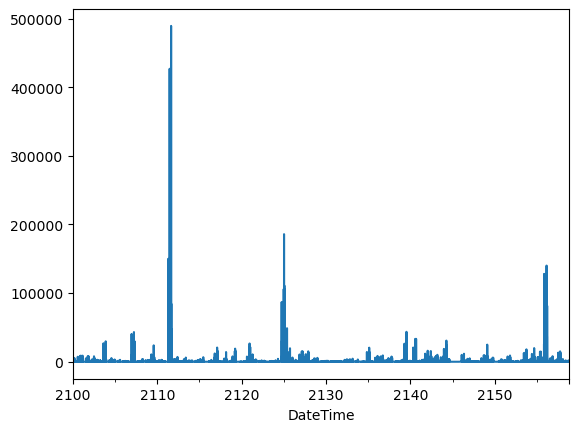

In [50]:
# 간단한 생산량 시계열 시각화
# X축이 생성한 시간정보 인덱스로 표시
import matplotlib.pyplot as plt

df_test2['Y2013'].plot()
plt.show()

## 데이터의 시계열인덱스 중복처리

> **"현실 데이터에선 `시간정보가 중복되는 오류` 존재 할 수 있으며, `중복되지 않은 값`들로 `Groupby 하여 값선택` 필요"**
>
>```python
># 중복 인덱스 존재 확인
df.index.is_unique
>
># 인덱스 중복시 첫번째 값으로 선택
df.groupby(level=0).first()
>
># groupby로 여러가지 통계량 확인 및 최종 값선택
df.groupby(level=0).agg(['first', 'last', 'min', 'max', 'mean'])
>```

In [51]:
# 임의 중복 인덱스 생성
dt_index = pd.date_range('2050-01-01', periods=10)
dt_index = dt_index.append(pd.DatetimeIndex(['2050-01-03', '2050-01-07']))
dt_index

DatetimeIndex(['2050-01-01', '2050-01-02', '2050-01-03', '2050-01-04',
               '2050-01-05', '2050-01-06', '2050-01-07', '2050-01-08',
               '2050-01-09', '2050-01-10', '2050-01-03', '2050-01-07'],
              dtype='datetime64[ns]', freq=None)

In [52]:
# 중복 인덱스 사용 데이터 생성
df_test = pd.Series(range(len(dt_index)), index=dt_index)
df_test

2050-01-01     0
2050-01-02     1
2050-01-03     2
2050-01-04     3
2050-01-05     4
2050-01-06     5
2050-01-07     6
2050-01-08     7
2050-01-09     8
2050-01-10     9
2050-01-03    10
2050-01-07    11
dtype: int64

In [53]:
# 중복 인덱스 존재 여부 확인
df_test.index.is_unique

False

In [54]:
# 중복 인덱스 존재 여부 확인
df_test.index.nunique() == len(dt_index)

False

In [55]:
# 중복 인덱스 존재 여부 확인
df_test.groupby(level=0).count()

2050-01-01    1
2050-01-02    1
2050-01-03    2
2050-01-04    1
2050-01-05    1
2050-01-06    1
2050-01-07    2
2050-01-08    1
2050-01-09    1
2050-01-10    1
dtype: int64

In [56]:
# 중복 인덱스의 값들을 평균하여 사용
df_test.groupby(level=0).mean()

2050-01-01    0.0
2050-01-02    1.0
2050-01-03    6.0
2050-01-04    3.0
2050-01-05    4.0
2050-01-06    5.0
2050-01-07    8.5
2050-01-08    7.0
2050-01-09    8.0
2050-01-10    9.0
dtype: float64

In [57]:
# 중복 인덱스의 값들 중 첫번째 등장했던 값 사용
df_test.groupby(level=0).first()

2050-01-01    0
2050-01-02    1
2050-01-03    2
2050-01-04    3
2050-01-05    4
2050-01-06    5
2050-01-07    6
2050-01-08    7
2050-01-09    8
2050-01-10    9
dtype: int64

In [58]:
# 중복 인덱스의 값들 중 마자막에 등장했던 값 사용
df_test.groupby(level=0).last()

2050-01-01     0
2050-01-02     1
2050-01-03    10
2050-01-04     3
2050-01-05     4
2050-01-06     5
2050-01-07    11
2050-01-08     7
2050-01-09     8
2050-01-10     9
dtype: int64

In [59]:
# agg 함수로 다양한 수치 한번에 계산 가능
# 값선택 로직 정확성 확인 및 최종 값선택 전처리
df_test.groupby(level=0).agg(['first', 'last', 'min', 'max', 'mean'])

,first,last,min,max,mean
2050-01-01,0,0,0,0,0.0
2050-01-02,1,1,1,1,1.0
2050-01-03,2,10,2,10,6.0
2050-01-04,3,3,3,3,3.0
2050-01-05,4,4,4,4,4.0
2050-01-06,5,5,5,5,5.0
2050-01-07,6,11,6,11,8.5
2050-01-08,7,7,7,7,7.0
2050-01-09,8,8,8,8,8.0
2050-01-10,9,9,9,9,9.0


## 데이터의 시계열인덱스 누락처리

> **"현실 데이터에선 `시간정보가 누락되는 오류` 존재 할 수 있음"**
>
> - 금융시장 데이터는 `Business Day`의 데이터만 존재하고 `공휴일은 데이터 없음`
> - `일정한 시간주기` 전처리를 위해 `시간빈도(Frequency) 설정`이 필요하고 `resample 함수`로 쉽게 발견 가능
>
>```python
># 빈도설정으로 누락시점을 찾고 데이터 채우기
df.asfreq('frequency', method=..., fill_value=...)
df.resample('frequency').func().fillna(method=..., value=...)
>```

In [60]:
# 임의 누락 인덱스 생성
dt_index = pd.date_range('2050-01-01', periods=10)
dt_index = dt_index.drop(pd.DatetimeIndex(['2050-01-03', '2050-01-07']))
dt_index

DatetimeIndex(['2050-01-01', '2050-01-02', '2050-01-04', '2050-01-05',
               '2050-01-06', '2050-01-08', '2050-01-09', '2050-01-10'],
              dtype='datetime64[ns]', freq=None)

In [61]:
# 누락 인덱스 사용 데이터 생성
df_test = pd.Series(range(len(dt_index)), index=dt_index)
df_test

2050-01-01    0
2050-01-02    1
2050-01-04    2
2050-01-05    3
2050-01-06    4
2050-01-08    5
2050-01-09    6
2050-01-10    7
dtype: int64

In [62]:
# 시간빈도만 설정해도 누락된 Timestamp 표시
df_test.asfreq('D')

2050-01-01    0.0
2050-01-02    1.0
2050-01-03    NaN
2050-01-04    2.0
2050-01-05    3.0
2050-01-06    4.0
2050-01-07    NaN
2050-01-08    5.0
2050-01-09    6.0
2050-01-10    7.0
Freq: D, dtype: float64

In [63]:
# method 매개변수로 앞의/뒤의 값으로 누락값을 채울지 결정 
df_test.asfreq('D', method='ffill')

2050-01-01    0
2050-01-02    1
2050-01-03    1
2050-01-04    2
2050-01-05    3
2050-01-06    4
2050-01-07    4
2050-01-08    5
2050-01-09    6
2050-01-10    7
Freq: D, dtype: int64

In [64]:
# fill_value 매개변수로 특정 값으로 누락값 채우기
df_test.asfreq('D', fill_value=10)

2050-01-01     0
2050-01-02     1
2050-01-03    10
2050-01-04     2
2050-01-05     3
2050-01-06     4
2050-01-07    10
2050-01-08     5
2050-01-09     6
2050-01-10     7
Freq: D, dtype: int64

In [65]:
# 시간빈도 변경을 통해 쉽게 다른 차원의 Timestamp 생성 가능
df_test.asfreq('H')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1886393162.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.asfreq('H')


2050-01-01 00:00:00    0.0
2050-01-01 01:00:00    NaN
2050-01-01 02:00:00    NaN
2050-01-01 03:00:00    NaN
2050-01-01 04:00:00    NaN
                      ... 
2050-01-09 20:00:00    NaN
2050-01-09 21:00:00    NaN
2050-01-09 22:00:00    NaN
2050-01-09 23:00:00    NaN
2050-01-10 00:00:00    7.0
Freq: h, Length: 217, dtype: float64

In [66]:
# 시간빈도 변경을 통해 쉽게 다른 차원의 Timestamp 생성 가능
df_test.asfreq('30T')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\4240252430.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_test.asfreq('30T')


2050-01-01 00:00:00    0.0
2050-01-01 00:30:00    NaN
2050-01-01 01:00:00    NaN
2050-01-01 01:30:00    NaN
2050-01-01 02:00:00    NaN
                      ... 
2050-01-09 22:00:00    NaN
2050-01-09 22:30:00    NaN
2050-01-09 23:00:00    NaN
2050-01-09 23:30:00    NaN
2050-01-10 00:00:00    7.0
Freq: 30min, Length: 433, dtype: float64

In [67]:
# 시간빈도 변경을 통해 쉽게 다른 차원의 Timestamp 생성 가능
# 결측치 NaN도 처리 가능
df_test.asfreq('30T', fill_value=10)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\3235151025.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_test.asfreq('30T', fill_value=10)


2050-01-01 00:00:00     0
2050-01-01 00:30:00    10
2050-01-01 01:00:00    10
2050-01-01 01:30:00    10
2050-01-01 02:00:00    10
                       ..
2050-01-09 22:00:00    10
2050-01-09 22:30:00    10
2050-01-09 23:00:00    10
2050-01-09 23:30:00    10
2050-01-10 00:00:00     7
Freq: 30min, Length: 433, dtype: int64

In [68]:
# resample 함수를 통해 asfreq과 마찬가지의 기능 실행 가능
df_test.index

DatetimeIndex(['2050-01-01', '2050-01-02', '2050-01-04', '2050-01-05',
               '2050-01-06', '2050-01-08', '2050-01-09', '2050-01-10'],
              dtype='datetime64[ns]', freq=None)

In [69]:
# resample 함수를 통해 asfreq과 마찬가지의 기능 실행 가능
# 누락 Timestamp 추적
df_test.resample('D').first()

2050-01-01    0.0
2050-01-02    1.0
2050-01-03    NaN
2050-01-04    2.0
2050-01-05    3.0
2050-01-06    4.0
2050-01-07    NaN
2050-01-08    5.0
2050-01-09    6.0
2050-01-10    7.0
Freq: D, dtype: float64

In [70]:
# fillna 함수를 이어서 실행하여 결측치 처리
df_test.resample('D').first().fillna(method='ffill')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\3205919645.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test.resample('D').first().fillna(method='ffill')


2050-01-01    0.0
2050-01-02    1.0
2050-01-03    1.0
2050-01-04    2.0
2050-01-05    3.0
2050-01-06    4.0
2050-01-07    4.0
2050-01-08    5.0
2050-01-09    6.0
2050-01-10    7.0
Freq: D, dtype: float64

In [71]:
# fillna 함수를 이어서 실행하여 결측치 처리
df_test.resample('D').first().fillna(method='bfill')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\472387369.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test.resample('D').first().fillna(method='bfill')


2050-01-01    0.0
2050-01-02    1.0
2050-01-03    2.0
2050-01-04    2.0
2050-01-05    3.0
2050-01-06    4.0
2050-01-07    5.0
2050-01-08    5.0
2050-01-09    6.0
2050-01-10    7.0
Freq: D, dtype: float64

In [72]:
# fillna 함수를 이어서 실행하여 결측치 처리
df_test.resample('D').first().fillna(value=10)

2050-01-01     0.0
2050-01-02     1.0
2050-01-03    10.0
2050-01-04     2.0
2050-01-05     3.0
2050-01-06     4.0
2050-01-07    10.0
2050-01-08     5.0
2050-01-09     6.0
2050-01-10     7.0
Freq: D, dtype: float64

In [73]:
# 시간빈도 변경을 통해 쉽게 다른 차원의 Timestamp 생성 가능
df_test.resample('H').first()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\4238919000.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('H').first()


2050-01-01 00:00:00    0.0
2050-01-01 01:00:00    NaN
2050-01-01 02:00:00    NaN
2050-01-01 03:00:00    NaN
2050-01-01 04:00:00    NaN
                      ... 
2050-01-09 20:00:00    NaN
2050-01-09 21:00:00    NaN
2050-01-09 22:00:00    NaN
2050-01-09 23:00:00    NaN
2050-01-10 00:00:00    7.0
Freq: h, Length: 217, dtype: float64

In [74]:
# 시간빈도 변경을 통해 쉽게 다른 차원의 Timestamp 생성 가능
df_test.resample('30T').first()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1588797217.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_test.resample('30T').first()


2050-01-01 00:00:00    0.0
2050-01-01 00:30:00    NaN
2050-01-01 01:00:00    NaN
2050-01-01 01:30:00    NaN
2050-01-01 02:00:00    NaN
                      ... 
2050-01-09 22:00:00    NaN
2050-01-09 22:30:00    NaN
2050-01-09 23:00:00    NaN
2050-01-09 23:30:00    NaN
2050-01-10 00:00:00    7.0
Freq: 30min, Length: 433, dtype: float64

In [75]:
# 시간빈도 변경을 통해 쉽게 다른 차원의 Timestamp 생성 가능
# 결측치 NaN도 처리 가능
df_test.resample('30T').first().fillna(value=10)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2145329631.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_test.resample('30T').first().fillna(value=10)


2050-01-01 00:00:00     0.0
2050-01-01 00:30:00    10.0
2050-01-01 01:00:00    10.0
2050-01-01 01:30:00    10.0
2050-01-01 02:00:00    10.0
                       ... 
2050-01-09 22:00:00    10.0
2050-01-09 22:30:00    10.0
2050-01-09 23:00:00    10.0
2050-01-09 23:30:00    10.0
2050-01-10 00:00:00     7.0
Freq: 30min, Length: 433, dtype: float64

# **빈도별 데이터 집계(Data Aggregation by Frequency)**

> **"특정 `시간단위나 빈도를 변환`하는 과정에서 `데이터 샘플이 증가 또는 감소` 할 수 있는데, 증가/감소에 따른 `적절한 데이터 집계 방법 필요`"**
>
> - **Downsampling:** 시간빈도 감소로 `데이터 샘플이 감소`하기 때문에 `데이터 집계/요약 필요`
> - **Upsampling:** 시간빈도 증가로 `데이터 샘플이 증가`하기 때문에 `결측치 반영 필요`

<center><img src='Image/Advanced/Upsampling-and-downsampling.png' width='300'>(https://sqlrelease.com/python-use-case-resampling-time-series-data-upsampling-and-downsampling-sql-server-2017)</center>

<center><img src='Image/Advanced/Downsampling_vs_Upsampling.png' width='600'>(https://rfriend.tistory.com/)</center>

---

## Downsampling에서 데이터 집계

- `resample` 함수는 `asfreq` 보다 더욱 많은 기능이 포함되어 있으며, `데이터 감소에 따른 데이터 집계 연산`을 다양하게 지원

In [76]:
# 임의 시계열 인덱스 생성
df_test = pd.DataFrame(index=pd.date_range(start='2050-01-01', periods=20, freq='1h'))
df_test                      

""
2050-01-01 00:00:00
2050-01-01 01:00:00
2050-01-01 02:00:00
2050-01-01 03:00:00
2050-01-01 04:00:00
2050-01-01 05:00:00
2050-01-01 06:00:00
2050-01-01 07:00:00
2050-01-01 08:00:00
2050-01-01 09:00:00


In [77]:
# 가격과 거래량 데이터 생성
import numpy as np

np.random.seed(123)
if 'price' not in df.columns:
    df_test['price'] = np.random.randint(low=10, high=100, size=20)
    df_test['volumn'] = np.random.randint(low=1, high=10, size=20)
df_test

,price,volumn
2050-01-01 00:00:00,76,8
2050-01-01 01:00:00,27,3
2050-01-01 02:00:00,93,5
2050-01-01 03:00:00,67,9
2050-01-01 04:00:00,96,1
2050-01-01 05:00:00,57,8
2050-01-01 06:00:00,83,4
2050-01-01 07:00:00,42,5
2050-01-01 08:00:00,56,7
2050-01-01 09:00:00,35,2


In [78]:
# resample 함수로 2시간 간격으로 데이터를 추출
# 2시간 간격으로 데이터를 groupby 하는 것과 같은 기능
df_test.resample('2H')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\588713179.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H')


In [79]:
# 2시간 간격으로 groupby한 후 첫번째 값들을 추출
df_test.resample('2H').first()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\3733412895.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H').first()


,price,volumn
2050-01-01 00:00:00,76,8
2050-01-01 02:00:00,93,5
2050-01-01 04:00:00,96,1
2050-01-01 06:00:00,83,4
2050-01-01 08:00:00,56,7
2050-01-01 10:00:00,93,6
2050-01-01 12:00:00,46,3
2050-01-01 14:00:00,78,9
2050-01-01 16:00:00,65,6
2050-01-01 18:00:00,12,3


In [80]:
# 2시간 간격으로 groupby한 후 마지막 값들을 추출
df_test.resample('2H').last()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\3236185180.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H').last()


,price,volumn
2050-01-01 00:00:00,27,3
2050-01-01 02:00:00,67,9
2050-01-01 04:00:00,57,8
2050-01-01 06:00:00,42,5
2050-01-01 08:00:00,35,2
2050-01-01 10:00:00,88,7
2050-01-01 12:00:00,90,2
2050-01-01 14:00:00,59,4
2050-01-01 16:00:00,77,1
2050-01-01 18:00:00,94,7


In [81]:
# 2시간 간격으로 groupby한 후 평균 값들을 추출
df_test.resample('2H').mean()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\342891535.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H').mean()


,price,volumn
2050-01-01 00:00:00,51.5,5.5
2050-01-01 02:00:00,80.0,7.0
2050-01-01 04:00:00,76.5,4.5
2050-01-01 06:00:00,62.5,4.5
2050-01-01 08:00:00,45.5,4.5
2050-01-01 10:00:00,90.5,6.5
2050-01-01 12:00:00,68.0,2.5
2050-01-01 14:00:00,68.5,6.5
2050-01-01 16:00:00,71.0,3.5
2050-01-01 18:00:00,53.0,5.0


In [82]:
# 2시간 간격으로 groupby한 후 합계 추출
df_test.resample('2H').sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\77629680.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H').sum()


,price,volumn
2050-01-01 00:00:00,103,11
2050-01-01 02:00:00,160,14
2050-01-01 04:00:00,153,9
2050-01-01 06:00:00,125,9
2050-01-01 08:00:00,91,9
2050-01-01 10:00:00,181,13
2050-01-01 12:00:00,136,5
2050-01-01 14:00:00,137,13
2050-01-01 16:00:00,142,7
2050-01-01 18:00:00,106,10


In [83]:
# 2시간 간격으로 groupby한 후 누적 합계 추출
df_test.resample('2H').sum().cumsum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\972930136.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H').sum().cumsum()


,price,volumn
2050-01-01 00:00:00,103,11
2050-01-01 02:00:00,263,25
2050-01-01 04:00:00,416,34
2050-01-01 06:00:00,541,43
2050-01-01 08:00:00,632,52
2050-01-01 10:00:00,813,65
2050-01-01 12:00:00,949,70
2050-01-01 14:00:00,1086,83
2050-01-01 16:00:00,1228,90
2050-01-01 18:00:00,1334,100


In [84]:
# 2시간 간격으로 groupby한 후 데이터 특성 추출
df_downs = pd.DataFrame()
df_downs = pd.concat([df_test.resample('2H').first(),
                      df_test.resample('2H').last(),
                      df_test.resample('2H').mean(),
                      df_test.resample('2H').sum(),
                      df_test.resample('2H').sum().cumsum()], axis=1)
df_downs

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1089441894.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs = pd.concat([df_test.resample('2H').first(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1089441894.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H').last(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1089441894.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H').mean(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1089441894.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.resample('2H').sum(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1089441894.py:7: FutureWarning: 'H' is deprecated and will be removed in a f

,price,volumn,price,volumn,price,volumn,price,volumn,price,volumn
2050-01-01 00:00:00,76,8,27,3,51.5,5.5,103,11,103,11
2050-01-01 02:00:00,93,5,67,9,80.0,7.0,160,14,263,25
2050-01-01 04:00:00,96,1,57,8,76.5,4.5,153,9,416,34
2050-01-01 06:00:00,83,4,42,5,62.5,4.5,125,9,541,43
2050-01-01 08:00:00,56,7,35,2,45.5,4.5,91,9,632,52
2050-01-01 10:00:00,93,6,88,7,90.5,6.5,181,13,813,65
2050-01-01 12:00:00,46,3,90,2,68.0,2.5,136,5,949,70
2050-01-01 14:00:00,78,9,59,4,68.5,6.5,137,13,1086,83
2050-01-01 16:00:00,65,6,77,1,71.0,3.5,142,7,1228,90
2050-01-01 18:00:00,12,3,94,7,53.0,5.0,106,10,1334,100


In [85]:
# 2시간 간격으로 price의 기초통계량 추출
df_downs = pd.DataFrame()
df_downs = pd.concat([df_test.price.resample('2H').min(),
                      df_test.price.resample('2H').max(),
                      df_test.price.resample('2H').mean(),
                      df_test.price.resample('2H').median(),
                      df_test.price.resample('2H').var(),
                      np.sqrt(df_test.price.resample('2H').var())], axis=1)
df_downs

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1346478228.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs = pd.concat([df_test.price.resample('2H').min(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1346478228.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.price.resample('2H').max(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1346478228.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.price.resample('2H').mean(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1346478228.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test.price.resample('2H').median(),
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1346478228.py:7: FutureWarning: 'H' is deprecated an

,price,price,price,price,price,price
2050-01-01 00:00:00,27,76,51.5,51.5,1200.5,34.648232
2050-01-01 02:00:00,67,93,80.0,80.0,338.0,18.384776
2050-01-01 04:00:00,57,96,76.5,76.5,760.5,27.577164
2050-01-01 06:00:00,42,83,62.5,62.5,840.5,28.991378
2050-01-01 08:00:00,35,56,45.5,45.5,220.5,14.849242
2050-01-01 10:00:00,88,93,90.5,90.5,12.5,3.535534
2050-01-01 12:00:00,46,90,68.0,68.0,968.0,31.112698
2050-01-01 14:00:00,59,78,68.5,68.5,180.5,13.435029
2050-01-01 16:00:00,65,77,71.0,71.0,72.0,8.485281
2050-01-01 18:00:00,12,94,53.0,53.0,3362.0,57.982756


In [86]:
# 4시간 간격으로 price의 기초통계량 추출
# 각각 변수를 선언하여 컬럼명을 바꿀수도 있음
df_downs = pd.DataFrame()
df_downs['price_min'] = df_test.price.resample('4H').min()
df_downs['price_max'] = df_test.price.resample('4H').max()
df_downs['price_mean'] = df_test.price.resample('4H').mean()
df_downs['price_median'] = df_test.price.resample('4H').median()
df_downs['price_var'] = df_test.price.resample('4H').var()
df_downs['price_std'] = np.sqrt(df_test.price.resample('4H').var())
df_downs

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2936170987.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs['price_min'] = df_test.price.resample('4H').min()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2936170987.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs['price_max'] = df_test.price.resample('4H').max()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2936170987.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs['price_mean'] = df_test.price.resample('4H').mean()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2936170987.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs['price_median'] = df_test.price.resample('4H').median()
C:\Users\Public\Documents\ESTsoft\Creato

,price_min,price_max,price_mean,price_median,price_var,price_std
2050-01-01 00:00:00,27,93,65.75,71.5,783.583333,27.992559
2050-01-01 04:00:00,42,96,69.50,70.0,599.000000,24.474477
2050-01-01 08:00:00,35,93,68.00,72.0,752.666667,27.434771
2050-01-01 12:00:00,46,90,68.25,68.5,382.916667,19.568257
2050-01-01 16:00:00,12,94,62.00,71.0,1252.666667,35.393031


In [87]:
# 함수화를 통해 다양한 빈도에서의 Downsample 집계 가능
def resample_ts(df, freq, col_num):
    df_downs = pd.DataFrame()
    df_downs['price_min'] = df.price.resample(freq).min()
    df_downs['price_max'] = df.price.resample(freq).max()
    df_downs['price_mean'] = df.price.resample(freq).mean()
    df_downs['price_median'] = df.price.resample(freq).median()
    df_downs['price_var'] = df.price.resample(freq).var()
    df_downs['price_std'] = np.sqrt(df.price.resample(freq).var())
    result = df_downs.iloc[:,[col_num]]
    result.columns = ['Price']
    return result

resample_ts(df_test, '6H', 2)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2655291925.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs['price_min'] = df.price.resample(freq).min()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2655291925.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs['price_max'] = df.price.resample(freq).max()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2655291925.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs['price_mean'] = df.price.resample(freq).mean()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2655291925.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_downs['price_median'] = df.price.resample(freq).median()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3140

,Price
2050-01-01 00:00:00,69.333333
2050-01-01 06:00:00,66.166667
2050-01-01 12:00:00,69.166667
2050-01-01 18:00:00,53.000000


In [88]:
# 임의 시계열 인덱스 생성
# 가격과 거래량 데이터 생성
df_test = pd.DataFrame(index=pd.date_range(start='2050-01-01', end='2050-03-31', 
                                           freq='30min'))
np.random.seed(123)
if 'price' not in df.columns:
    df_test['price'] = np.random.randint(low=10, high=100, size=df_test.shape[0])
    df_test['volumn'] = np.random.randint(low=1, high=10, size=df_test.shape[0])
df_test            

,price,volumn
2050-01-01 00:00:00,76,5
2050-01-01 00:30:00,27,5
2050-01-01 01:00:00,93,2
2050-01-01 01:30:00,67,5
2050-01-01 02:00:00,96,4
...,...,...
2050-03-30 22:00:00,28,5
2050-03-30 22:30:00,47,7
2050-03-30 23:00:00,74,1
2050-03-30 23:30:00,31,9


In [89]:
# 다양한 빈도에서의 Downsample 집계 가능
# 1D, 1W, 2W, 1M
def resample_ts(df, freq, col_num):
    df_downs = pd.DataFrame()
    df_downs['price_min'] = df.price.resample(freq).min()
    df_downs['price_max'] = df.price.resample(freq).max()
    df_downs['price_mean'] = df.price.resample(freq).mean()
    df_downs['price_median'] = df.price.resample(freq).median()
    df_downs['price_var'] = df.price.resample(freq).var()
    df_downs['price_std'] = np.sqrt(df.price.resample(freq).var())
    result = df_downs.iloc[:,[col_num]]
    result.columns = ['Price']
    return result

resample_ts(df_test, '1D', 4)

,Price
2050-01-01,618.085106
2050-01-02,820.125887
2050-01-03,726.806738
2050-01-04,772.253546
2050-01-05,722.180408
...,...
2050-03-27,719.260638
2050-03-28,667.687500
2050-03-29,454.210993
2050-03-30,643.113032


In [90]:
# 다양한 빈도에서의 Downsample 집계 가능
resample_ts(df_test, '1W', 4)

,Price
2050-01-02,729.610088
2050-01-09,736.509879
2050-01-16,666.984755
2050-01-23,599.270140
2050-01-30,755.223872
2050-02-06,737.046828
2050-02-13,671.750924
2050-02-20,694.141711
2050-02-27,669.907880
2050-03-06,630.631095


In [91]:
# 다양한 빈도에서의 Downsample 집계 가능
resample_ts(df_test, '2W', 4)

,Price
2050-01-02,729.610088
2050-01-16,700.708954
2050-01-30,676.346995
2050-02-13,703.491056
2050-02-27,681.009439
2050-03-13,652.597607
2050-03-27,680.220458
2050-04-10,596.115709


In [92]:
# 다양한 빈도에서의 Downsample 집계 가능
resample_ts(df_test, '1M', 4)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\342987759.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_downs['price_min'] = df.price.resample(freq).min()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\342987759.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_downs['price_max'] = df.price.resample(freq).max()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\342987759.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_downs['price_mean'] = df.price.resample(freq).mean()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\342987759.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_downs['price_median'] = df.price.resample(freq).median()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3140

,Price
2050-01-31,696.284832
2050-02-28,686.208940
2050-03-31,658.029654


## Upsampling에서 데이터 집계

- `resample` 함수는 `asfreq` 보다 더욱 많은 기능이 포함되어 있으며, `데이터 증가에 따른 결측값 처리`을 편리하게 지원

In [93]:
# 임의 시계열 인덱스 생성
# 가격과 거래량 데이터 생성
df_test = pd.DataFrame(index=pd.date_range(start='2050-01-01', end='2050-01-02', 
                                           freq='1H'))
np.random.seed(123)
if 'price' not in df.columns:
    df_test['price'] = np.random.randint(low=10, high=100, size=df_test.shape[0])
    df_test['volumn'] = np.random.randint(low=1, high=10, size=df_test.shape[0])
df_test            

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\2873646718.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test = pd.DataFrame(index=pd.date_range(start='2050-01-01', end='2050-01-02',


,price,volumn
2050-01-01 00:00:00,76,1
2050-01-01 01:00:00,27,8
2050-01-01 02:00:00,93,4
2050-01-01 03:00:00,67,5
2050-01-01 04:00:00,96,7
2050-01-01 05:00:00,57,2
2050-01-01 06:00:00,83,6
2050-01-01 07:00:00,42,7
2050-01-01 08:00:00,56,3
2050-01-01 09:00:00,35,2


In [94]:
# 1시간 단위의 데이터를 20분 단위의 데이터로 변환
# 비어있는 Timestamp 때문에 결측값이 생성
df_test.resample('20min').mean()

,price,volumn
2050-01-01 00:00:00,76.0,1.0
2050-01-01 00:20:00,NaN,NaN
2050-01-01 00:40:00,NaN,NaN
2050-01-01 01:00:00,27.0,8.0
2050-01-01 01:20:00,NaN,NaN
...,...,...
2050-01-01 22:40:00,NaN,NaN
2050-01-01 23:00:00,57.0,5.0
2050-01-01 23:20:00,NaN,NaN
2050-01-01 23:40:00,NaN,NaN


> **"결측값이 있을 때 통상 `fillna` 또는 `interpolate` 함수를 사용하여 채움"**

In [95]:
# ffill 설정을 통해 위 샘플로 아래 결측치를 채움
df_ups = df_test.resample('20min').mean()
df_ups.fillna(method='ffill')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1440210372.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ups.fillna(method='ffill')


,price,volumn
2050-01-01 00:00:00,76.0,1.0
2050-01-01 00:20:00,76.0,1.0
2050-01-01 00:40:00,76.0,1.0
2050-01-01 01:00:00,27.0,8.0
2050-01-01 01:20:00,27.0,8.0
...,...,...
2050-01-01 22:40:00,94.0,7.0
2050-01-01 23:00:00,57.0,5.0
2050-01-01 23:20:00,57.0,5.0
2050-01-01 23:40:00,57.0,5.0


In [96]:
# bfill 설정을 통해 아래 샘플로 위 결측치를 채움
df_ups.fillna(method='bfill')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31408\1438154391.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ups.fillna(method='bfill')


,price,volumn
2050-01-01 00:00:00,76.0,1.0
2050-01-01 00:20:00,27.0,8.0
2050-01-01 00:40:00,27.0,8.0
2050-01-01 01:00:00,27.0,8.0
2050-01-01 01:20:00,93.0,4.0
...,...,...
2050-01-01 22:40:00,57.0,5.0
2050-01-01 23:00:00,57.0,5.0
2050-01-01 23:20:00,71.0,8.0
2050-01-01 23:40:00,71.0,8.0


In [97]:
# value 설정을 통해 특정 값으로 결측치를 채움
df_ups.fillna(value=100)

,price,volumn
2050-01-01 00:00:00,76.0,1.0
2050-01-01 00:20:00,100.0,100.0
2050-01-01 00:40:00,100.0,100.0
2050-01-01 01:00:00,27.0,8.0
2050-01-01 01:20:00,100.0,100.0
...,...,...
2050-01-01 22:40:00,100.0,100.0
2050-01-01 23:00:00,57.0,5.0
2050-01-01 23:20:00,100.0,100.0
2050-01-01 23:40:00,100.0,100.0


In [98]:
# value 설정을 통해 특정 값으로 결측치를 채움
df_ups.fillna(value=df_ups.mean())

,price,volumn
2050-01-01 00:00:00,76.00,1.0
2050-01-01 00:20:00,67.24,4.8
2050-01-01 00:40:00,67.24,4.8
2050-01-01 01:00:00,27.00,8.0
2050-01-01 01:20:00,67.24,4.8
...,...,...
2050-01-01 22:40:00,67.24,4.8
2050-01-01 23:00:00,57.00,5.0
2050-01-01 23:20:00,67.24,4.8
2050-01-01 23:40:00,67.24,4.8


In [99]:
# limit 설정을 통해 특정 값으로 결측치를 채우는 갯수를 제한
df_ups.fillna(value=df_ups.mean(), limit=2)

,price,volumn
2050-01-01 00:00:00,76.00,1.0
2050-01-01 00:20:00,67.24,4.8
2050-01-01 00:40:00,67.24,4.8
2050-01-01 01:00:00,27.00,8.0
2050-01-01 01:20:00,NaN,NaN
...,...,...
2050-01-01 22:40:00,NaN,NaN
2050-01-01 23:00:00,57.00,5.0
2050-01-01 23:20:00,NaN,NaN
2050-01-01 23:40:00,NaN,NaN


In [100]:
# interpolate 함수를 통해 값들을 선으로 이어 생성된 값으로 채움
df_ups.interpolate(method='linear')

,price,volumn
2050-01-01 00:00:00,76.000000,1.000000
2050-01-01 00:20:00,59.666667,3.333333
2050-01-01 00:40:00,43.333333,5.666667
2050-01-01 01:00:00,27.000000,8.000000
2050-01-01 01:20:00,49.000000,6.666667
...,...,...
2050-01-01 22:40:00,69.333333,5.666667
2050-01-01 23:00:00,57.000000,5.000000
2050-01-01 23:20:00,61.666667,6.000000
2050-01-01 23:40:00,66.333333,7.000000


<Axes: >

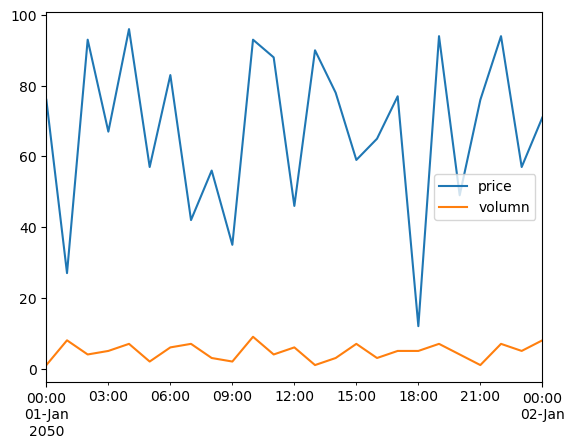

In [101]:
# interpolate 함수를 통해 값들을 선으로 이어 생성된 값으로 채움
# 시각화로 채워진 값을 유추 가능
df_ups.interpolate(method='linear').plot()

<Axes: >

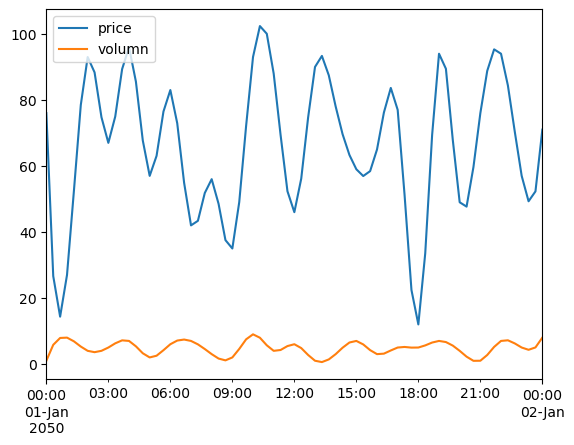

In [102]:
# interpolate 함수를 통해 값들을 선으로 이어 생성된 값으로 채움
# method 매개변수로 고차원 또는 비선형 함수를 사용시 좀더 매끄러운 값으로 채움
df_ups.interpolate(method='cubic').plot()

In [103]:
# method에 따른 결측치 채운 값의 차이 확인
pd.concat([df_ups.interpolate(method='linear'), 
           df_ups.interpolate(method='cubic')], axis=1)

,price,volumn,price,volumn
2050-01-01 00:00:00,76.000000,1.000000,76.000000,1.000000
2050-01-01 00:20:00,59.666667,3.333333,26.642764,5.818205
2050-01-01 00:40:00,43.333333,5.666667,14.358655,7.899008
2050-01-01 01:00:00,27.000000,8.000000,27.000000,8.000000
2050-01-01 01:20:00,49.000000,6.666667,52.419122,6.878769
...,...,...,...,...
2050-01-01 22:40:00,69.333333,5.666667,70.362148,6.241869
2050-01-01 23:00:00,57.000000,5.000000,57.000000,5.000000
2050-01-01 23:20:00,61.666667,6.000000,49.304519,4.313686
2050-01-01 23:40:00,66.333333,7.000000,52.297315,5.030997


# **다양한 시간변수 추출(Time Feature Engineering)**

> **"데이터가 `생성된 시간정보`에서 필요에 따라 연/월/일/시/분/초/요일 등의 `시간패턴 추정에 활용하기 위한 특정 시간변수 생성` 필요"**

In [104]:
# 시간 인덱스를 변수로 초기화
df_test = df.iloc[:,:1].copy()
df_test.index = pd.date_range('2100-01-01', periods=df.shape[0])
df_test.reset_index(inplace=True)
df_test

,index,Area Abbreviation
0,2100-01-01,AF
1,2100-01-02,AF
2,2100-01-03,AF
3,2100-01-04,AF
4,2100-01-05,AF
...,...,...
21472,2158-10-16,ZW
21473,2158-10-17,ZW
21474,2158-10-18,ZW
21475,2158-10-19,ZW


In [105]:
# 년/월/일 추출 및 변수 생성
if 'Year' not in df_test.columns:
    df_test['Year'] = df_test['index'].dt.year
    df_test['Month'] = df_test['index'].dt.month
    df_test['Day'] = df_test['index'].dt.day
    
df_test

,index,Area Abbreviation,Year,Month,Day
0,2100-01-01,AF,2100,1,1
1,2100-01-02,AF,2100,1,2
2,2100-01-03,AF,2100,1,3
3,2100-01-04,AF,2100,1,4
4,2100-01-05,AF,2100,1,5
...,...,...,...,...,...
21472,2158-10-16,ZW,2158,10,16
21473,2158-10-17,ZW,2158,10,17
21474,2158-10-18,ZW,2158,10,18
21475,2158-10-19,ZW,2158,10,19


In [106]:
# 시/분/초 추출 및 변수 생성
if 'Hour' not in df_test.columns:
    df_test['Hour'] = df_test['index'].dt.hour
    df_test['Minute'] = df_test['index'].dt.minute
    df_test['Second'] = df_test['index'].dt.second
    
df_test

,index,Area Abbreviation,Year,Month,Day,Hour,Minute,Second
0,2100-01-01,AF,2100,1,1,0,0,0
1,2100-01-02,AF,2100,1,2,0,0,0
2,2100-01-03,AF,2100,1,3,0,0,0
3,2100-01-04,AF,2100,1,4,0,0,0
4,2100-01-05,AF,2100,1,5,0,0,0
...,...,...,...,...,...,...,...,...
21472,2158-10-16,ZW,2158,10,16,0,0,0
21473,2158-10-17,ZW,2158,10,17,0,0,0
21474,2158-10-18,ZW,2158,10,18,0,0,0
21475,2158-10-19,ZW,2158,10,19,0,0,0


In [107]:
# 몇번째 주 추출 및 변수 생성
# dt.week 대신 dt.isocalendar().week 로 버전 변경 예정
if 'Week' not in df_test.columns:
    df_test['Week'] = df_test['index'].dt.isocalendar().week
    
df_test

,index,Area Abbreviation,Year,Month,Day,Hour,Minute,Second,Week
0,2100-01-01,AF,2100,1,1,0,0,0,53
1,2100-01-02,AF,2100,1,2,0,0,0,53
2,2100-01-03,AF,2100,1,3,0,0,0,53
3,2100-01-04,AF,2100,1,4,0,0,0,1
4,2100-01-05,AF,2100,1,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...
21472,2158-10-16,ZW,2158,10,16,0,0,0,42
21473,2158-10-17,ZW,2158,10,17,0,0,0,42
21474,2158-10-18,ZW,2158,10,18,0,0,0,42
21475,2158-10-19,ZW,2158,10,19,0,0,0,42


In [108]:
# 요일 추출 및 변수 생성
# 월요일이 0, 일요일이 6
if 'WeekDay' not in df_test.columns:
    df_test['WeekDay'] = df_test['index'].dt.weekday
    
df_test

,index,Area Abbreviation,Year,Month,Day,Hour,Minute,Second,Week,WeekDay
0,2100-01-01,AF,2100,1,1,0,0,0,53,4
1,2100-01-02,AF,2100,1,2,0,0,0,53,5
2,2100-01-03,AF,2100,1,3,0,0,0,53,6
3,2100-01-04,AF,2100,1,4,0,0,0,1,0
4,2100-01-05,AF,2100,1,5,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
21472,2158-10-16,ZW,2158,10,16,0,0,0,42,0
21473,2158-10-17,ZW,2158,10,17,0,0,0,42,1
21474,2158-10-18,ZW,2158,10,18,0,0,0,42,2
21475,2158-10-19,ZW,2158,10,19,0,0,0,42,3


In [109]:
# 시/분/초 변수 삭제
if 'Hour' in df_test.columns:
    del df_test['Hour']
    del df_test['Minute']
    del df_test['Second']
    
df_test

,index,Area Abbreviation,Year,Month,Day,Week,WeekDay
0,2100-01-01,AF,2100,1,1,53,4
1,2100-01-02,AF,2100,1,2,53,5
2,2100-01-03,AF,2100,1,3,53,6
3,2100-01-04,AF,2100,1,4,1,0
4,2100-01-05,AF,2100,1,5,1,1
...,...,...,...,...,...,...,...
21472,2158-10-16,ZW,2158,10,16,42,0
21473,2158-10-17,ZW,2158,10,17,42,1
21474,2158-10-18,ZW,2158,10,18,42,2
21475,2158-10-19,ZW,2158,10,19,42,3


In [110]:
# 시간 차이 계산을 위한 현재 시간 정보 확인
dt.datetime.now()

datetime.datetime(2025, 3, 1, 22, 58, 51, 767725)

In [111]:
# 시간 차이 계산을 위한 현재 시간 정보에서 필요 정보 추출
dt.datetime(dt.datetime.now().year, dt.datetime.now().month, dt.datetime.now().day)

datetime.datetime(2025, 3, 1, 0, 0)

In [112]:
# 시간 차이 계산
df_test['index'] - dt.datetime(dt.datetime.now().year, dt.datetime.now().month, dt.datetime.now().day)

0       27334 days
1       27335 days
2       27336 days
3       27337 days
4       27338 days
           ...    
21472   48806 days
21473   48807 days
21474   48808 days
21475   48809 days
21476   48810 days
Name: index, Length: 21477, dtype: timedelta64[ns]

In [113]:
# 시간 차이 변수 생성
if 'Time_Diff' not in df_test.columns:
    df_test['Time_Diff'] = df_test['index'] - dt.datetime(dt.datetime.now().year, dt.datetime.now().month, dt.datetime.now().day)
    
df_test

,index,Area Abbreviation,Year,Month,Day,Week,WeekDay,Time_Diff
0,2100-01-01,AF,2100,1,1,53,4,27334 days
1,2100-01-02,AF,2100,1,2,53,5,27335 days
2,2100-01-03,AF,2100,1,3,53,6,27336 days
3,2100-01-04,AF,2100,1,4,1,0,27337 days
4,2100-01-05,AF,2100,1,5,1,1,27338 days
...,...,...,...,...,...,...,...,...
21472,2158-10-16,ZW,2158,10,16,42,0,48806 days
21473,2158-10-17,ZW,2158,10,17,42,1,48807 days
21474,2158-10-18,ZW,2158,10,18,42,2,48808 days
21475,2158-10-19,ZW,2158,10,19,42,3,48809 days


In [114]:
# timedelta 함수로 특정 시간 간격 생성 가능
# 주/일/시/분/초/마이크로초/밀리초 생성 가능
dt.timedelta(weeks=10)

datetime.timedelta(days=70)

In [115]:
# 특정 시간과 시간정보 연산 가능
dt.datetime.now() + dt.timedelta(weeks=10)

datetime.datetime(2025, 5, 10, 22, 58, 51, 813531)

In [116]:
# Time_Diff에서 28000일 제외하기
if 'Time_Diff' in df_test.columns:
    df_test['Time_Diff'] = df_test['Time_Diff'] - dt.timedelta(days=28000)
    
df_test

,index,Area Abbreviation,Year,Month,Day,Week,WeekDay,Time_Diff
0,2100-01-01,AF,2100,1,1,53,4,-666 days
1,2100-01-02,AF,2100,1,2,53,5,-665 days
2,2100-01-03,AF,2100,1,3,53,6,-664 days
3,2100-01-04,AF,2100,1,4,1,0,-663 days
4,2100-01-05,AF,2100,1,5,1,1,-662 days
...,...,...,...,...,...,...,...,...
21472,2158-10-16,ZW,2158,10,16,42,0,20806 days
21473,2158-10-17,ZW,2158,10,17,42,1,20807 days
21474,2158-10-18,ZW,2158,10,18,42,2,20808 days
21475,2158-10-19,ZW,2158,10,19,42,3,20809 days
